# Parsing Locobot Dataset using cocoapi
* Install [pycocoapi](https://github.com/cocodataset/cocoapi)
* Download [locobot images dataset](https://www.dropbox.com/sh/f5jcs8pbuax9jgc/AAATpjE3MpiKZe1T7zML9iima?dl=0) and assign its path to the variable `images_folder`.
* Download [annotations file](https://www.dropbox.com/s/020boxvshpowngi/ny_coco_annotations.json?dl=0) and assign its path to the variable `annoation_file`.
* Run the notebook.

In [78]:
from pycocotools.coco import COCO
import skimage.io as io
import matplotlib
import matplotlib.pyplot as plt
import os
import random
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

annotation_file = '/scratch/dhirajgandhi/droidlet/locobot/label_propogation/habitat_sem_annot.json'
images_folder = '/checkpoint/dhirajgandhi/active_vision/habitat_data_with_seg/rgb'

# Load COCO annotations
coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.11s)
creating index...
index created!


In [79]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

COCO categories: 
backpack base-cabinet basket bathtub beam beanbag bed bench bike bin blanket blinds book bottle box bowl camera cabinet candle chair chopping-board clock cloth clothing coaster comforter computer-keyboard cup cushion curtain ceiling cooktop countertop desk desk-organizer desktop-computer door exercise-ball faucet floor handbag hair-dryer handrail indoor-plant knife-block kitchen-utensil lamp laptop major-appliance mat microwave monitor mouse nightstand pan panel paper-towel phone picture pillar pillow pipe plant-stand plate pot rack refrigerator remote-control scarf sculpture shelf shoe shower-stall sink small-appliance sofa stair stool switch table table-runner tablet tissue-paper toilet toothbrush towel tv-screen tv-stand umbrella utensil-holder vase vent wall wall-cabinet wall-plug wardrobe window rug logo bag set-of-clothing



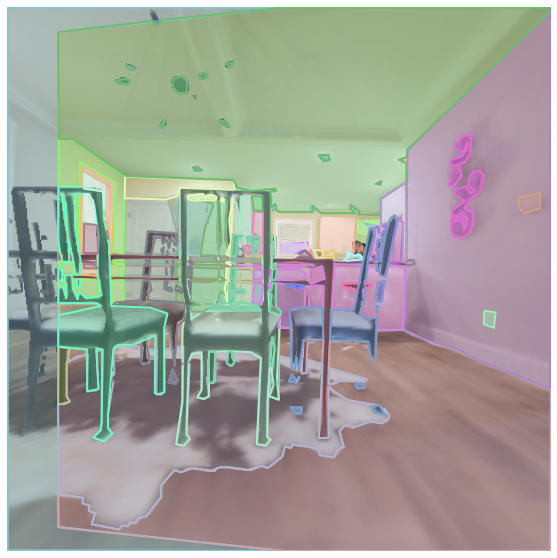

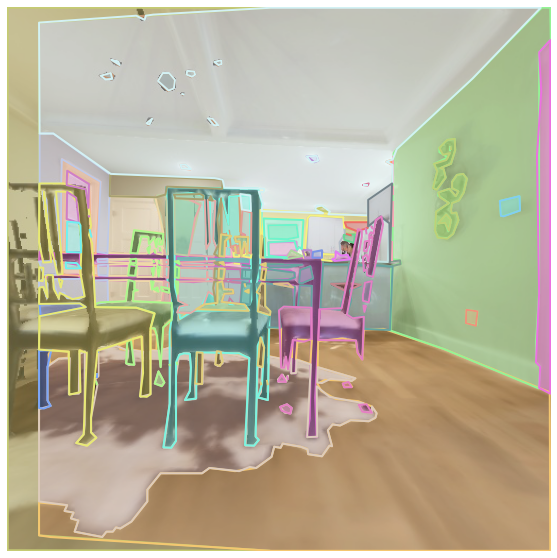

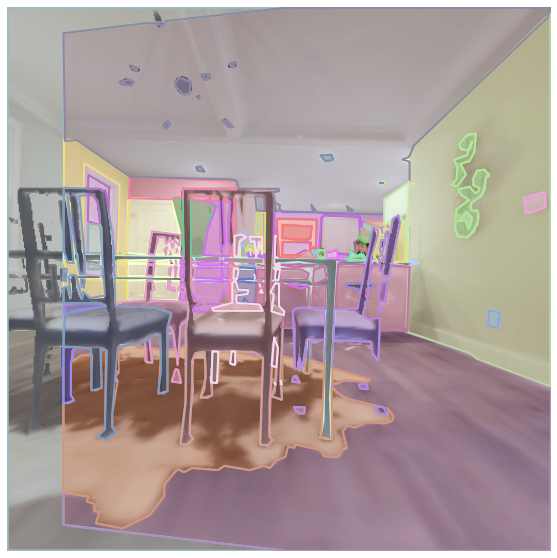

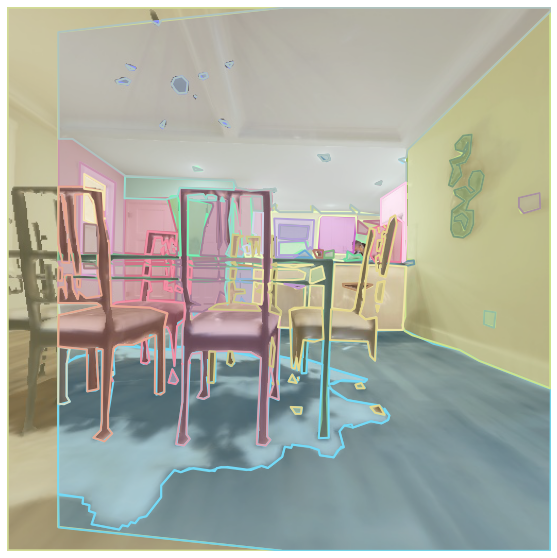

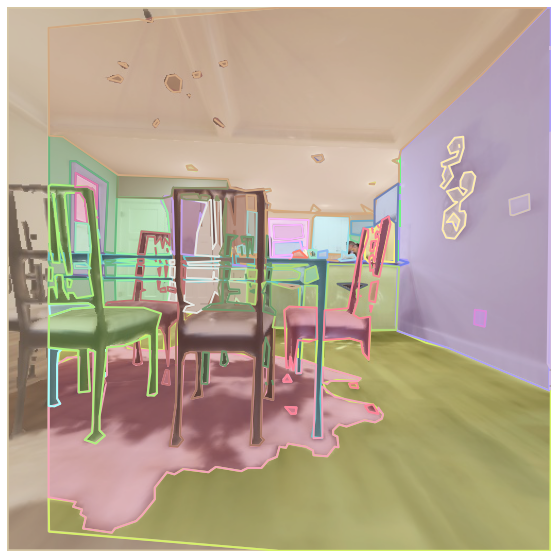

In [80]:
# Display 5 random files with all annotations 
imgIds = coco.getImgIds()
imgs = coco.loadImgs(random.choices(imgIds, k=5))

for x in imgs:
    I = io.imread(os.path.join(images_folder, x['file_name']))
    plt.axis('off')
    plt.imshow(I)
    annIds = coco.getAnnIds(imgIds=[x['id']])
    anns = coco.loadAnns(annIds)
    coco.showAnns(anns)
    plt.show()